In [56]:
import os
import os.path as path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img_path = '../data/dataset/images'
txt_path = '../data/dataset/texts'

In [7]:
def extract_coordinate(file):
    with open(file, 'r') as f:
        data = f.read().splitlines()
        lines = [line.split(',')[:8] for line in data]
        return [[int(value) for value in line] for line in lines]

In [52]:
def creat_map(img_size, boxes):
    '''
        img_size: (h, w)
        boxes[i]: x0, y0, x1, y1, x2, y2, x3, y3
    '''
    map_img = np.zeros(img_size)
    for i, box in enumerate(boxes):
        xmin, xmax = min(box[::2]), max(box[::2])
        ymin, ymax = min(box[1::2]), max(box[1::2])

        width_y = ymax - ymin
        y_center = (ymax + ymin) / 2
        M = lambda y: 1.0 / (2 * np.pi * width_y) * np.exp(-y**2 / (2 * width_y**2))
        for y in range(ymin, ymax, 1):
            map_img[y, :] = M(y - y_center)
    return map_img

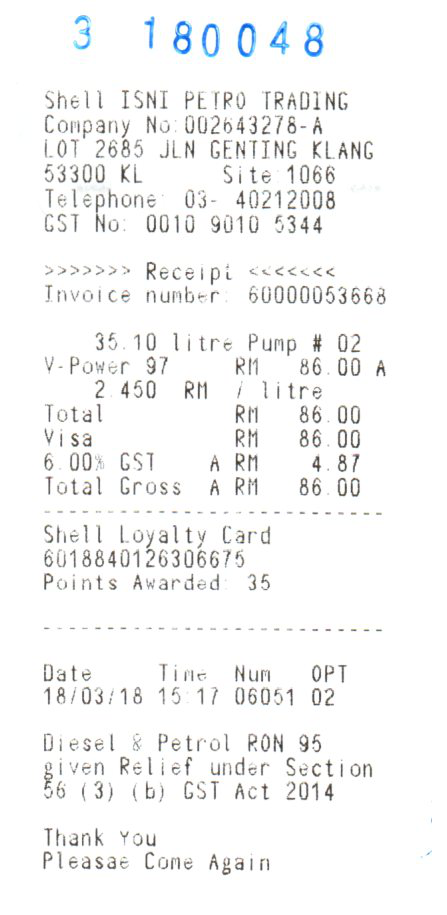

In [53]:
img = Image.open(path.join(img_path, 'X51005306399.jpg'))
boxes = extract_coordinate(path.join(txt_path, 'X51005306399.txt'))
img

In [54]:
w, h = img.size
map_img = creat_map((h, w), [boxes[45]])

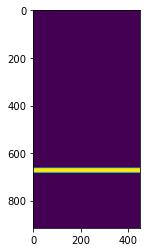

In [57]:
plt.imshow(map_img)